<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-datos" data-toc-modified-id="Exploración-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración datos</a></span></li><li><span><a href="#Nivel-de-obesidad" data-toc-modified-id="Nivel-de-obesidad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nivel de obesidad</a></span></li><li><span><a href="#Exploración-Previa---Solo-cuantitativa" data-toc-modified-id="Exploración-Previa---Solo-cuantitativa-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploración Previa - Solo cuantitativa</a></span></li><li><span><a href="#Exploración-Total" data-toc-modified-id="Exploración-Total-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploración Total</a></span></li><li><span><a href="#Aprendizaje-Supervisado" data-toc-modified-id="Aprendizaje-Supervisado-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aprendizaje Supervisado</a></span></li><li><span><a href="#Infome-Final" data-toc-modified-id="Infome-Final-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Infome Final</a></span></li></ul></div>

#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)



Este ejercicio guiado pretende que ustedes hagan una exploración completa a la base, identifiquen grupos en la población y desarrolen modelos que permitan determinar el nivel de obesidad para cualquier individuo.

Después de descargar, cargamos la base:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
DataO=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfretamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas. En lo que sigue se sugeriran algunos puntos a desarrollar en este trabajo.

## Exploración de datos

La idea en esta sección es hacer un EDA sobre la base. Es muy importante identificar datos atípicos, nulos y relaciones entre variables (colinealidad, alta correlación, etc.).

## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

<AxesSubplot:xlabel='Weight', ylabel='Height'>

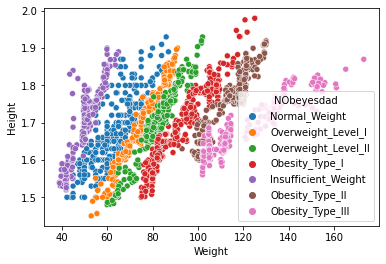

In [4]:
import seaborn as sns
sns.scatterplot(data=DataO,x='Weight',y='Height',hue='NObeyesdad')

Extraiga esas columnas de la base y haga los análisis a continuación sin tener en cuenta esas variables. Responda:

**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

## Exploración Previa - Solo cuantitativa

1. Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usen reducciones de dimensionalidad.

3. Concluyan a partir de los resultados.

## Exploración Total

1. Crearemos Clusters usando también las variables cualitativas, el ejercicio consiste en poder medir distancias incluso entre variables/componentes cualitativas. Lo haremos con la distancia de Gower (qué es y como se calcula en Python), con esta distancia se monta una matriz de distancias entre los datos. 

**Solución:**

La distancia de Gower se puede utilizar para medir qué tan diferentes son dos registros. Los registros pueden contener una combinación de datos lógicos, categóricos, numéricos o de texto. La distancia es siempre un número entre 0 (idéntico) y 1 (máximamente diferente). 

Las métricas utilizadas para cada tipo de datos se describen a continuación:

- Cuantitativo (intervalo): distancia de Manhattan normalizada por rango.

- Ordinal: la variable se clasifica primero, luego la distancia de Manhattan se usa con un ajuste especial para los empates.

- Nominal: las variables de k categorías se convierten primero en k columnas binarias y luego se usa el coeficiente de Dice.


En esencia, la distancia de Gower es calculada como el promedio de disimilaridades parciales entre individuos. De manera general, este coeficiente se calcula como sigue:

$$D_{Gow}(x_1,x_2)=1-\frac{1}{p}\sum\limits_{j=1}^p s_j(x_1,x_2).$$

Aquí $s_j(x_1,x_2)$ se conoce como la similaridad parcial de $j$-ésimo descriptor.



Para descriptores cuantitativos tenemos:

$$s_j(x_1,x_2)=1-\cfrac{|y_{1j}-y_{2j}|}{R_j}$$

Para descriptores cualitativos se usa el coeficiente de Sorensen-Dice, se calcula de la siguiente forma:

$$s_j(x_1,x_2)=1-\frac{NNEQ}{NTT+NNZ}$$

donde (tomado de scikit-learn):

***

N : number of dimensions

NTT : number of dims in which both values are True

NTF : number of dims in which the first value is True, second is False

NFT : number of dims in which the first value is False, second is True

NFF : number of dims in which both values are False

NNEQ : number of non-equal dimensions, NNEQ = NTF + NFT

NNZ : number of nonzero dimensions, NNZ = NTF + NFT + NTT
***



|reg|Color|orientacion|
|:--:|:--:|:--:|
|1|Amarillo|izquierda|
|2|Amarillo|derecha|

|reg|Amarillo|Azul|Rojo|Derecha|izquierda|
|:--:|:--:|:--:|:--:|:--:|:-:|
|1|1|0|0|0|1|
|2|1|0|0|1|0|


Ahora calculemos la distancia de Gower:




In [67]:
#!pip install gower

In [12]:
columns=['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

In [13]:
DataO[columns]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [14]:
import gower as gw
distance_matrix=gw.gower_matrix(DataO[columns])
distance_matrix

array([[0.        , 0.39285713, 0.1935157 , ..., 0.22912727, 0.2560275 ,
        0.24810961],
       [0.39285713, 0.        , 0.4197062 , ..., 0.31121933, 0.28990546,
        0.2957041 ],
       [0.1935157 , 0.4197062 , 0.        , ..., 0.2792388 , 0.31779242,
        0.31523904],
       ...,
       [0.22912727, 0.31121933, 0.2792388 , ..., 0.        , 0.04000032,
        0.04229332],
       [0.2560275 , 0.28990546, 0.31779242, ..., 0.04000032, 0.        ,
        0.00871602],
       [0.24810961, 0.2957041 , 0.31523904, ..., 0.04229332, 0.00871602,
        0.        ]], dtype=float32)

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usar reducciones de dimensionalidad.

3. Concluyan a partir de los resultados.

## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.

2. Usando la base de entrenamiento crearán algunos modelos de clasificación con los siguientes métodos:

* Regresión Logística
* Clasificador Naive Bayes 
* Arboles de decisión
* Random Forest 
* SVD

3. Usando la base de testeo validar cada modelo (Uso matrices de confusión, estadísticos apropiados, curvas ROC, AUC...)

4. De acuerdo con los resultados identifico problemas como sobre ajuste y mal desempeño del modelo.

5. Si lo anterior resulta cierto aplico técnicas de regularización para estimar un modelo de clasificación adecuado.

6. Visualizamos el modelo (si es posible). 


## Infome Final

Elaboramos un informe como cuaderno de jupyter que responda la pregunta planteada en esta investigación ¿Como afectan la condición física y los hábitos alimenticios a la obesidad? 